<a href="https://colab.research.google.com/github/yasmienAshraf/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection_using_Finetuned_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Brain-Tumor-Detection

Brain tumors are a serious medical concern, caused by the abnormal growth of cells in the brain. Diagnosing them can be incredibly challenging, not just because they are rare, but also because they come in so many different forms. Typically, doctors rely on Magnetic Resonance Imaging (MRI) to locate and analyze these tumors, but the traditional process is time-consuming, complicated, and prone to errors when done manually. This is where artificial intelligence (AI) steps in to make a difference. In this study, we use deep learning, specifically a fine-tuned EfficientNet-B0 model, to improve the accuracy and efficiency of detecting brain tumors in MRI scans. By applying image enhancement techniques and data augmentation, we aim to ensure the model can work with high-quality data and deliver reliable results. The findings show that this AI-powered approach can significantly streamline the detection process while maintaining high levels of accuracy.

#1- Load data

---------------------------------------------------------------

In [ ]:
import os
import pandas as pd
import shutil
import kagglehub

# Step 1: Download dataset using kagglehub
path = kagglehub.dataset_download("jakeshbohaju/brain-tumor")

# Step 2: Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor"
csv_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor.csv"


In [ ]:
# List all files in the directory
all_files = os.listdir(dataset_path)

# Count the number of .jpg files
num_images = sum(1 for file in all_files if file.lower().endswith('.jpg'))

# Print the total number of images
print(f"Total number of images: {num_images}")

Total number of images: 3762


In [ ]:
# Display the first few rows of the CSV file
df = pd.read_csv(csv_path)
print("CSV file contents:")
df

CSV file contents:


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


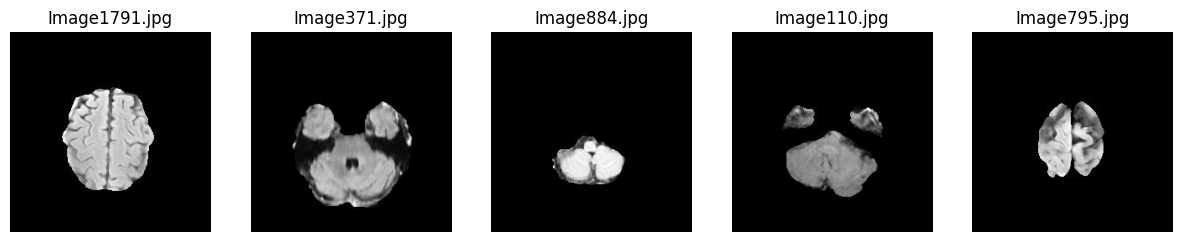

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# List all JPG files in the directory
image_files = [file for file in os.listdir(dataset_path) if file.lower().endswith('.jpg')]

# Display the first 5)
num_images_to_display = 5
plt.figure(figsize=(15, 10))

for i in range(min(num_images_to_display, len(image_files))):
    img_path = os.path.join(dataset_path, image_files[i])
    img = Image.open(img_path)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')  # Turn off axes for better visibility
    plt.title(image_files[i])

plt.show()


#2- Data Preprocessing

Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image1791.jpg
Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image371.jpg
Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image884.jpg
Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image110.jpg
Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image795.jpg
Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image1124.jpg
Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image2726.jpg
Processed and saved: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor/Image2953.jpg
Processed and saved:

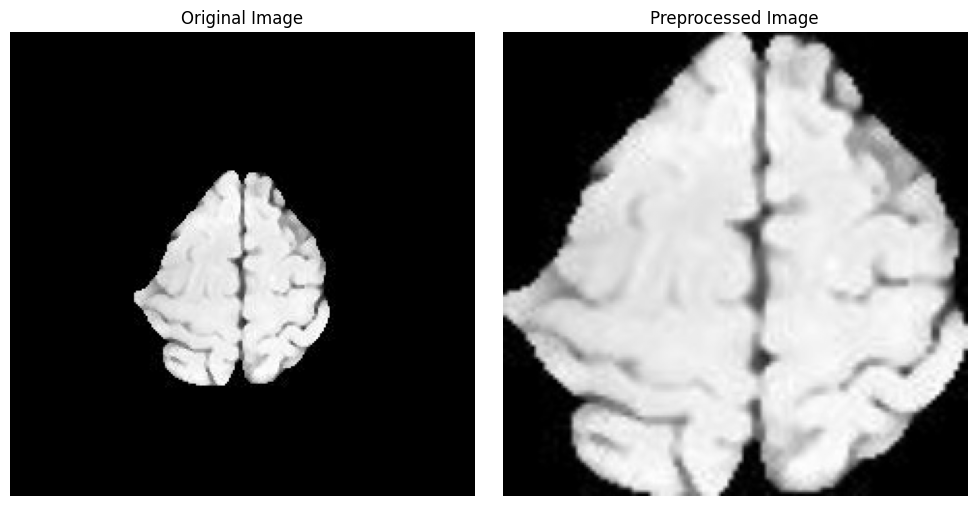

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define input and output directories
input_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor"
output_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)


def preprocess_and_crop(image_path, save_path):
    """Preprocess and crop the brain region from the MRI image."""
    # Step 1: Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Could not load image: {image_path}")
        return

    # Step 2: Apply Otsu’s Thresholding for segmentation
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 3: Find the largest contour (brain region)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print(f"No contours found for {image_path}")
        return

    # Get bounding box around the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Step 4: Crop the image
    cropped_image = image[y:y+h, x:x+w]

    # Step 5: Resize the cropped image back to 224x224
    cropped_resized = cv2.resize(cropped_image, (224, 224))

    # Step 6: Save the processed image
    cv2.imwrite(save_path, cropped_resized)
    print(f"Processed and saved: {save_path}")


# Process all images in the input directory
for image_name in os.listdir(input_dir):
    if image_name.lower().endswith('.jpg'):
        input_image_path = os.path.join(input_dir, image_name)
        output_image_path = os.path.join(output_dir, image_name)

        preprocess_and_crop(input_image_path, output_image_path)


# Function to visualize original vs processed images
def visualize_preprocessing(image_path):
    """Display the original and preprocessed image."""
    # Load original image
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Load processed image
    processed_path = os.path.join(output_dir, os.path.basename(image_path))
    processed = cv2.imread(processed_path, cv2.IMREAD_GRAYSCALE)

    if original is None or processed is None:
        print("Error: Could not load images for visualization.")
        return

    # Plot original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(processed, cmap='gray')
    axes[1].set_title("Preprocessed Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


# Example: Visualizing preprocessing for a sample image
sample_image_path = os.path.join(input_dir, "Image2224.jpg")  # Replace with an actual image name
visualize_preprocessing(sample_image_path)


## Sample example

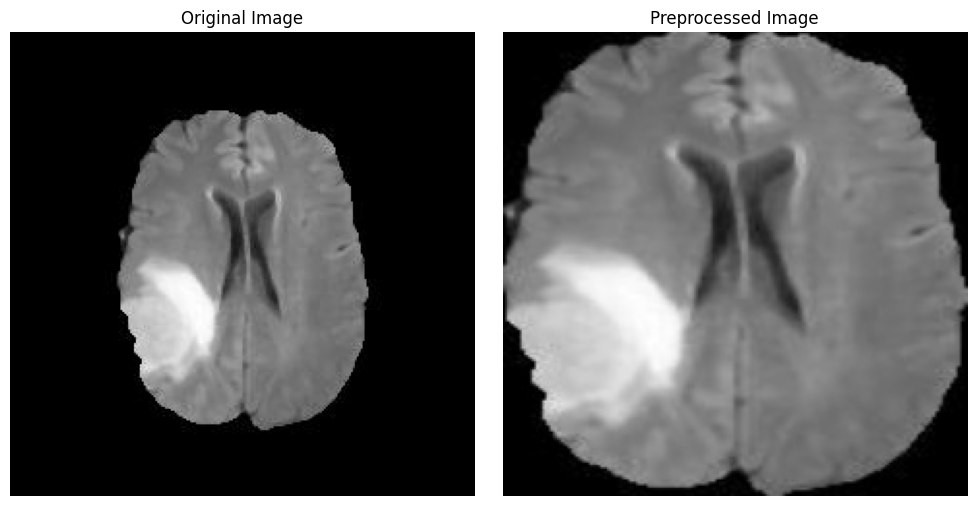

In [ ]:
# sample image
sample_image_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/Image1047.jpg"

# Example: Visualizing preprocessing for a sample image
visualize_preprocessing(sample_image_path)

# Display the cropped images from processed folder

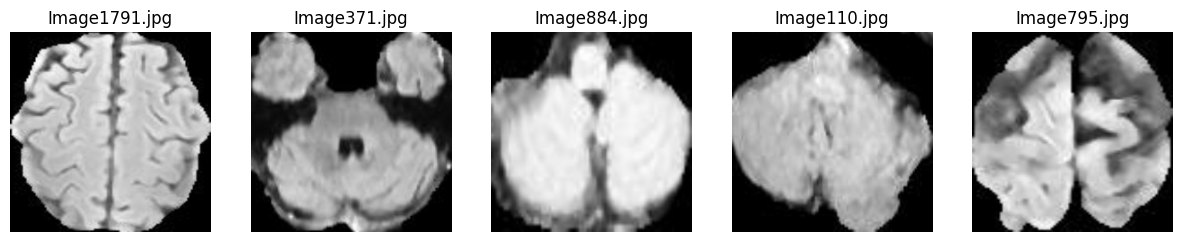

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the directory where cropped images are saved
processed_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor"

# List all .jpg images from the processed folder
image_files = [file for file in os.listdir(processed_dir) if file.lower().endswith('.jpg')]

# Display the first 5 images from the processed folder
num_images_to_display = 5
plt.figure(figsize=(15, 10))

for i in range(min(num_images_to_display, len(image_files))):
    img_path = os.path.join(processed_dir, image_files[i])
    img = Image.open(img_path).convert("L")  # ✅ Explicitly convert to grayscale

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img, cmap="gray")  # Force grayscale visualization
    plt.axis("off")  # Remove axis for clarity
    plt.title(image_files[i])

plt.show()


## List the numbers of image to be sure before starting next step

In [ ]:
# List all files in the directory
all_files = os.listdir(processed_dir)

# Count the number of .jpg files
num_images = sum(1 for file in all_files if file.lower().endswith('.jpg'))

# Print the total number of images
print(f"Total number of images: {num_images}")

Total number of images: 3762


#2- Splitting Dataset

In [ ]:
# Create classification folders
dataset_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor"

tumor_path = os.path.join(dataset_path, "Tumor")  # Folder for Tumor images
no_tumor_path = os.path.join(dataset_path, "No_Tumor")  # Folder for No_Tumor images

os.makedirs(tumor_path, exist_ok=True)
os.makedirs(no_tumor_path, exist_ok=True)

# Step 4: Read the CSV file
df = pd.read_csv(csv_path)

# Step 5: Move images based on classification
missing_files = []  # To track missing files
for _, row in df.iterrows():
    image_name = row['Image'] + ".jpg"  # Ensure image extension is added
    image_class = row['Class']  # 0 = No Tumor, 1 = Tumor

    # Define source and destination paths
    src = os.path.join(dataset_path, image_name)
    dst_folder = tumor_path if image_class == 1 else no_tumor_path
    dst = os.path.join(dst_folder, image_name)

    # Move the image if it exists
    if os.path.exists(src):
        shutil.move(src, dst)
    else:
        missing_files.append(image_name)

In [ ]:
import os
import shutil
import random

# Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Cropped Brain Tumor"
output_base = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor"

# Define train, val, test folders
train_dir = os.path.join(output_base, "train")
val_dir = os.path.join(output_base, "val")
test_dir = os.path.join(output_base, "test")

# Ensure directories exist
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(folder, "Tumor"), exist_ok=True)
    os.makedirs(os.path.join(folder, "No_Tumor"), exist_ok=True)

# Load all image files
categories = ["Tumor", "No_Tumor"]
data = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)

    for img in images:
        data.append((category, img))

# Shuffle data to ensure randomness
random.shuffle(data)

# Split data
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

# Function to copy images
def copy_images(data, target_folder):
    for category, img_name in data:
        src_path = os.path.join(dataset_path, category, img_name)
        dest_path = os.path.join(target_folder, category, img_name)
        shutil.copy2(src_path, dest_path)

# Copy images to respective folders
copy_images(train_data, train_dir)
copy_images(val_data, val_dir)
copy_images(test_data, test_dir)

print(" Dataset successfully split into Train (80%), Validation (10%), and Test (10%)")


 Dataset successfully split into Train (80%), Validation (10%), and Test (10%)


In [ ]:
import os

# Function to count images in each category
def count_images(folder):
    categories = os.listdir(folder)  # Get category names
    for category in categories:
        category_path = os.path.join(folder, category)  # Full path of the category
        num_images = len(os.listdir(category_path))  # Count the number of images
        print(f"Category '{category}' contains {num_images} images in: {folder}")

# Print the number of images in train, validation, and test folders
print(" Checking the number of images in each folder:")
count_images(train_dir)
count_images(val_dir)
count_images(test_dir)

 Checking the number of images in each folder:
Category 'Tumor' contains 1675 images in: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/train
Category 'No_Tumor' contains 2060 images in: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/train
Category 'Tumor' contains 447 images in: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/val
Category 'No_Tumor' contains 569 images in: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/val
Category 'Tumor' contains 459 images in: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/test
Category 'No_Tumor' contains 554 images in: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/test


In [ ]:
train_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/train"
print("Categories inside train_dir:", os.listdir(train_dir))

Categories inside train_dir: ['Tumor', 'No_Tumor']


In [ ]:
import os

# Define paths for Tumor and No_Tumor categories inside train directory
tumor_dir = os.path.join(train_dir, "Tumor")
no_tumor_dir = os.path.join(train_dir, "No_Tumor")

# List the first 5 images from each category
tumor_images = os.listdir(tumor_dir)[:5] if os.path.exists(tumor_dir) else []
no_tumor_images = os.listdir(no_tumor_dir)[:5] if os.path.exists(no_tumor_dir) else []

# Print the results
print(f"First 5 images in Tumor category: {tumor_images}")
print(f"First 5 images in No_Tumor category: {no_tumor_images}")

# Count the total images
print(f"Total images in Tumor category: {len(os.listdir(tumor_dir)) if os.path.exists(tumor_dir) else 0}")
print(f"Total images in No_Tumor category: {len(os.listdir(no_tumor_dir)) if os.path.exists(no_tumor_dir) else 0}")


First 5 images in Tumor category: ['Image2407.jpg', 'Image3573.jpg', 'Image647.jpg', 'Image892.jpg', 'Image2737.jpg']
First 5 images in No_Tumor category: ['Image1791.jpg', 'Image371.jpg', 'Image884.jpg', 'Image110.jpg', 'Image795.jpg']
Total images in Tumor category: 1675
Total images in No_Tumor category: 2060


## Display images from both categories (Tumor , No-Tumor)

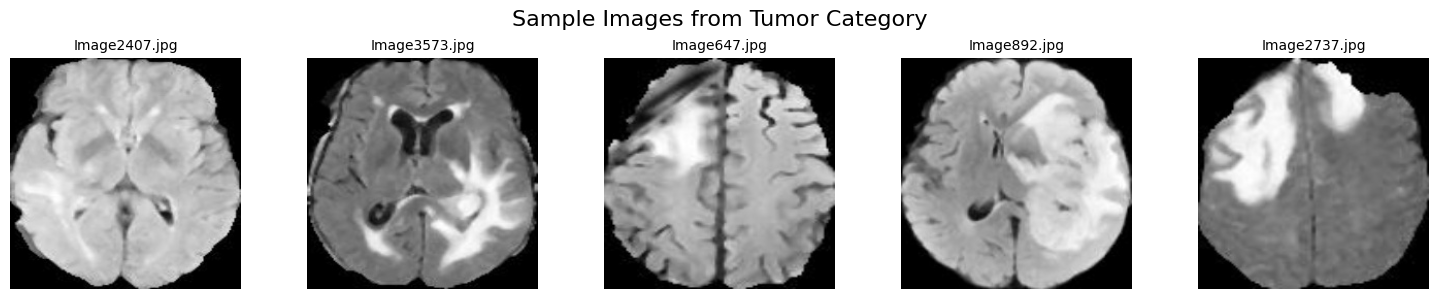

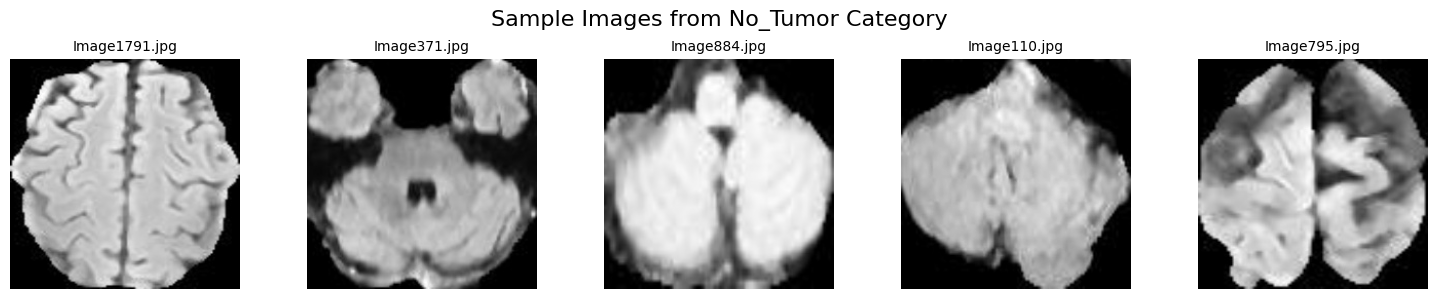

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Function to display images without extra white space
def display_images(category_path, category_name, num_images=5):
    image_files = os.listdir(category_path)[:num_images]  # Get first N images
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))  # Adjust figure size
    fig.suptitle(f"Sample Images from {category_name} Category", fontsize=16)

    for ax, img_name in zip(axes, image_files):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)

        ax.imshow(img, cmap="gray")  # Display as grayscale
        ax.axis("off")  # Hide axes
        ax.set_title(img_name, fontsize=10)  # Show filename

    plt.tight_layout()  # Adjust spacing to remove white area
    plt.show()

# Display images from both categories
display_images(tumor_dir, "Tumor")
display_images(no_tumor_dir, "No_Tumor")


## Example how to cropp an image

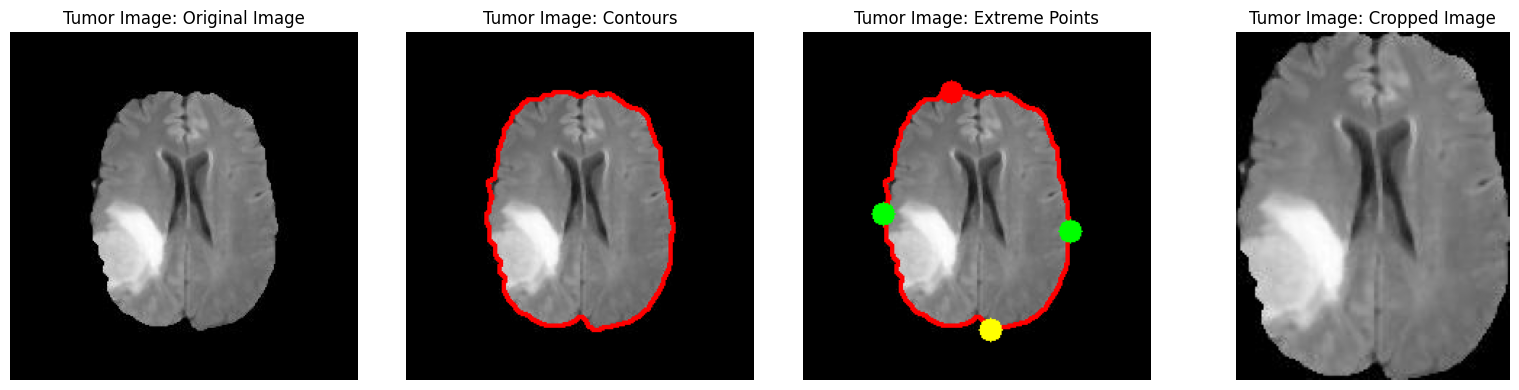

In [ ]:
import cv2

# Function to process image and extract contours, extreme points, and cropped regions
def process_image(image_path):

    # Step 1: we read the original image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        print(f"Image not found: {image_path}")
        return None, None, None, None

    # Step 2: Thresholding to create binary image
    _, binary_image = cv2.threshold(original_image, 30, 255, cv2.THRESH_BINARY)

    # Step 3: Find image contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Draw in red

    # Step 4: Find extreme points if contours are detected (coloured point)
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)
        left = tuple(largest_contour[largest_contour[:, :, 0].argmin()][0])
        right = tuple(largest_contour[largest_contour[:, :, 0].argmax()][0])
        top = tuple(largest_contour[largest_contour[:, :, 1].argmin()][0])
        bottom = tuple(largest_contour[largest_contour[:, :, 1].argmax()][0])

        # Mark extreme points
        extreme_image = contour_image.copy()
        cv2.circle(extreme_image, left, 8, (0, 255, 0), -1)  # Green
        cv2.circle(extreme_image, right, 8, (0, 255, 0), -1)  # Green
        cv2.circle(extreme_image, top, 8, (255, 0, 0), -1)  # Blue
        cv2.circle(extreme_image, bottom, 8, (255, 255, 0), -1)  # Yellow

        # Step 5: Crop the image
        cropped_image = original_image[top[1]:bottom[1], left[0]:right[0]]
    else:
        extreme_image = contour_image.copy()
        cropped_image = original_image  # Return original if no contours

    return original_image, contour_image, extreme_image, cropped_image

# Function to visualize the process
def visualize_process(image_path, title_prefix):
    original, contours, extremes, cropped = process_image(image_path)
    if original is None:
        return  # Skip visualization for missing images

    # Display the steps
    titles = [
        f"{title_prefix}: Original Image",
        f"{title_prefix}: Contours",
        f"{title_prefix}: Extreme Points",
        f"{title_prefix}: Cropped Image"
    ]
    images = [original, contours, extremes, cropped]

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# sample image
sample_image_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/Image1047.jpg"

# Visualize tumor image
visualize_process(sample_image_path, "Tumor Image")



# 3- Data Augmentation

We will use Albumentations for data augmentation, as it is a powerful and efficient library designed specifically for image transformations.

Transformations Applied:

- Rotation: Randomly rotate images within a specific degree range.
-  Flipping: Apply both horizontal and vertical flipping randomly.

In [ ]:
pip install albumentations opencv-python

In [ ]:
import cv2
import os
import shutil

def copy_training_data(src_folder, dest_folder):
    """Copy original training images to a new folder before augmentation."""
    os.makedirs(dest_folder, exist_ok=True)

    for category in ["Tumor", "No_Tumor"]:
        src_category_path = os.path.join(src_folder, category)
        dest_category_path = os.path.join(dest_folder, category)

        os.makedirs(dest_category_path, exist_ok=True)

        # Copy images
        for img_name in os.listdir(src_category_path):
            src_img_path = os.path.join(src_category_path, img_name)
            dest_img_path = os.path.join(dest_category_path, img_name)
            shutil.copy2(src_img_path, dest_img_path)

    print(f" Data copied to {dest_folder}")

def apply_transformations(image):
    """Apply transformations: Rotation & Flipping"""
    transformations = {
        "Original": image,
        "90_Rotation": cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
        "180_Rotation": cv2.rotate(image, cv2.ROTATE_180),
        "270_Rotation": cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
        "Horizontal_Flip": cv2.flip(image, 1),
        "Vertical_Flip": cv2.flip(image, 0),
    }
    return transformations

def augment_and_save_images(input_folder, output_folder, category):
    """Apply augmentation to images in the copied dataset and save new images."""
    category_path = os.path.join(input_folder, category)
    output_category_path = os.path.join(output_folder, category)
    os.makedirs(output_category_path, exist_ok=True)

    images = os.listdir(category_path)

    if not images:
        print(f"⚠️ No images found in {category_path}")
        return

    for img_name in images:
        img_path = os.path.join(category_path, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"⚠️ Failed to load: {img_path}")
            continue  # Skip if image is invalid

        transformed_images = apply_transformations(image)

        for i, (transformation, img) in enumerate(transformed_images.items()):
            aug_img_name = f"aug_{i}_{img_name}"
            aug_img_path = os.path.join(output_category_path, aug_img_name)
            cv2.imwrite(aug_img_path, img)

    print(f" Augmentation completed for {category} and saved in {output_category_path}")

# Define paths
train_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/train"
augmented_train_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train"

# Step 1: Copy training data before augmentation
copy_training_data(train_dir, augmented_train_dir)

# Step 2: Apply augmentation on the copied dataset
augment_and_save_images(augmented_train_dir, augmented_train_dir, "Tumor")
augment_and_save_images(augmented_train_dir, augmented_train_dir, "No_Tumor")


 Data copied to /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train
🎉 Augmentation completed for Tumor and saved in /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train/Tumor
🎉 Augmentation completed for No_Tumor and saved in /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train/No_Tumor


In [ ]:
import os

augmented_train_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train"
print("Available categories in Augmented_Train:", os.listdir(augmented_train_dir))


Available categories in Augmented_Train: ['Tumor', 'No_Tumor']


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor"
print("Available directories inside dataset_path:", os.listdir(dataset_path))


Available directories inside dataset_path: ['test', 'val', 'train']


In [ ]:
import os

augmented_tumor_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train/Tumor"
augmented_no_tumor_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train/No_Tumor"

print(f"Tumor images after augmentation: {len(os.listdir(augmented_tumor_dir))}")
print(f"No_Tumor images after augmentation: {len(os.listdir(augmented_no_tumor_dir))}")


Tumor images after augmentation: 69937
No_Tumor images after augmentation: 86132


## Examples of augmented images

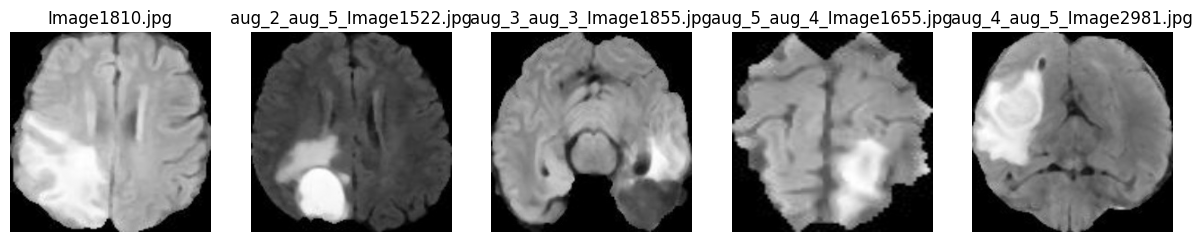

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

category = "Tumor"
category_path = os.path.join(augmented_train_dir, category)

image_files = random.sample(os.listdir(category_path), 5)

plt.figure(figsize=(15, 5))
for i, img_name in enumerate(image_files):
    img_path = os.path.join(category_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title(img_name)

plt.show()


## Display required transformations.

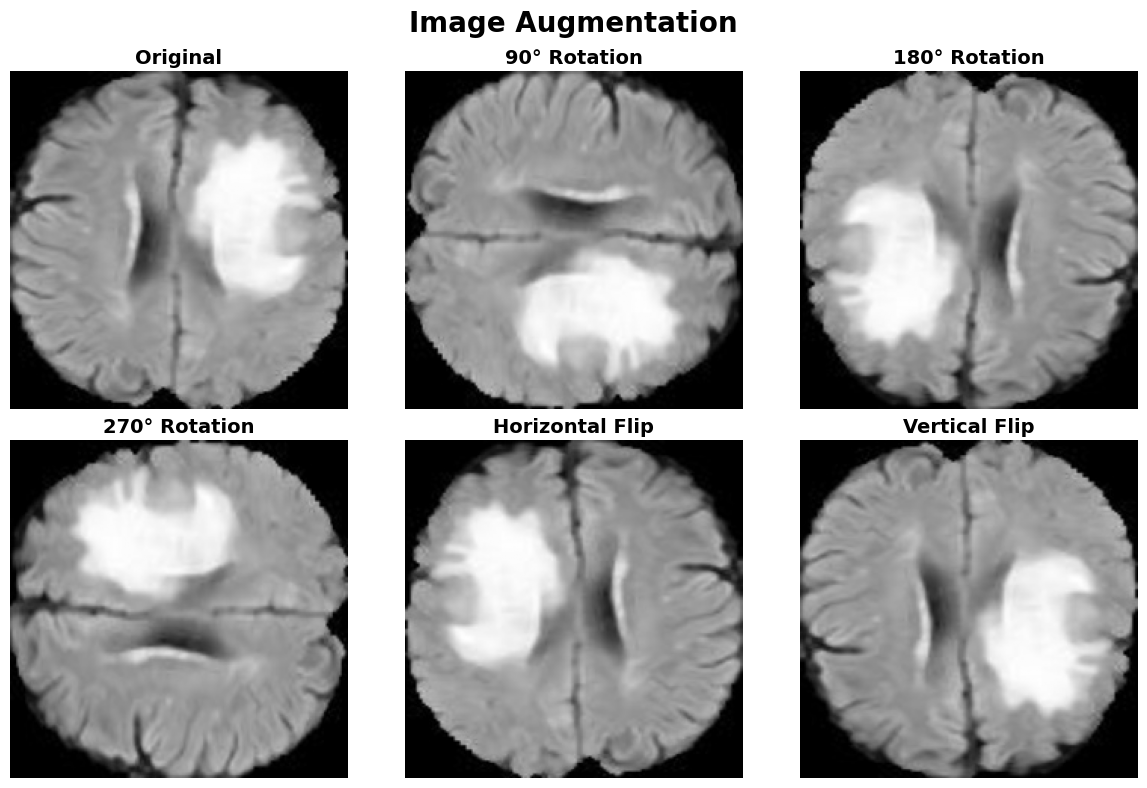

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to apply transformations
def apply_transformations(image):
    """Apply only the required transformations."""
    transformations = {
        "Original": image,
        "90° Rotation": cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
        "180° Rotation": cv2.rotate(image, cv2.ROTATE_180),
        "270° Rotation": cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
        "Horizontal Flip": cv2.flip(image, 1),
        "Vertical Flip": cv2.flip(image, 0),
    }
    return transformations

# sample image
sample_image_path= "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train/Tumor/Image3656.jpg"
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Apply transformations
transformed_images = apply_transformations(image)

# Plot images in a structured format with improved text visibility
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Increased figure size
fig.suptitle("Image Augmentation", fontsize=20, fontweight="bold")

for ax, (title, img) in zip(axes.flat, transformed_images.items()):
    ax.imshow(img, cmap="gray")
    ax.set_title(title, fontsize=14, fontweight="bold")  # Increased font size and weight
    ax.axis("off")

plt.tight_layout()
plt.show()


------------------------------------------------------------------------


# 4- Model Implementation

In [ ]:
augmented_train_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train"

In [ ]:
val_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/val"

In [ ]:
test_dir = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/test"

In [ ]:
import os

paths = [augmented_train_dir, val_dir, test_dir]

for path in paths:
    print(f"Checking: {path}")
    if os.path.exists(path):
        print(f" Exists - Contains {len(os.listdir(path))} files")
    else:
        print(" Path does not exist")


Checking: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train
 Exists - Contains 2 files
Checking: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/val
 Exists - Contains 2 files
Checking: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/test
 Exists - Contains 2 files


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
# 1. Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 2. Select a random sample and split the dataset
from torch.utils.data import random_split, DataLoader
import numpy as np

# Total number of images required
total_images = 6000
train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1
train_size = int(train_ratio * total_images)
val_size = int(val_ratio * total_images)
test_size = total_images - train_size - val_size

dataset_path = '/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Augmented_Train'
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Select a random sample
indices = np.random.permutation(len(dataset))[:total_images]
subset_dataset = torch.utils.data.Subset(dataset, indices)

# Split the sample
train_dataset, val_dataset, test_dataset = random_split(subset_dataset, [train_size, val_size, test_size])

# Prepare DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train set: {len(train_dataset)} images")
print(f"Validation set: {len(val_dataset)} images")
print(f"Test set: {len(test_dataset)} images")

# 3. Training and testing code (no major changes required):
# Use train_loader and val_loader for training and validation.
# Use test_loader for testing.


Train set: 4800 images
Validation set: 600 images
Test set: 600 images


In [ ]:
pip install --upgrade torchvision


In [ ]:
# =========================
# 2. Model Preparation
# =========================
# Import necessary modules
from torchvision import models
import torch.nn as nn
import torch
# Load pre-trained EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)

# Modify the final layers to align with the paper
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2),  # Default EfficientNet dropout
    nn.Linear(in_features=1280, out_features=512),  # Add dense layer with 512 units
    nn.ReLU(),  # Activation for the dense layer
    nn.Dropout(p=0.2),  # Dropout for better regularization
    nn.Linear(in_features=512, out_features=1),  # Final binary classification layer
    nn.Sigmoid()  # Activation function for binary output
)

# Send the model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 39.2MB/s]


Phase 1: Training Classifier Layers Only
Epoch 1/10, Train Loss: 0.3361, Validation Loss: 0.2631, Validation Accuracy: 89.17%
Epoch 2/10, Train Loss: 0.2407, Validation Loss: 0.2253, Validation Accuracy: 90.00%
Epoch 3/10, Train Loss: 0.2184, Validation Loss: 0.2232, Validation Accuracy: 90.17%
Epoch 4/10, Train Loss: 0.1970, Validation Loss: 0.2003, Validation Accuracy: 90.33%
Epoch 5/10, Train Loss: 0.1661, Validation Loss: 0.2014, Validation Accuracy: 91.83%
Epoch 6/10, Train Loss: 0.1596, Validation Loss: 0.1804, Validation Accuracy: 93.33%
Epoch 7/10, Train Loss: 0.1502, Validation Loss: 0.1581, Validation Accuracy: 93.33%
Epoch 8/10, Train Loss: 0.1280, Validation Loss: 0.1761, Validation Accuracy: 93.17%
Epoch 9/10, Train Loss: 0.1114, Validation Loss: 0.1850, Validation Accuracy: 92.83%
Epoch 10/10, Train Loss: 0.1108, Validation Loss: 0.1996, Validation Accuracy: 92.50%


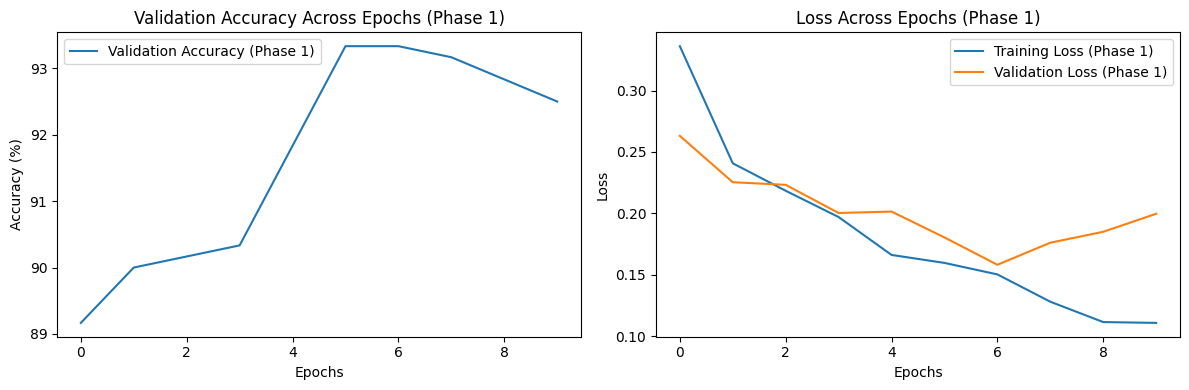

Phase 2: Fine-Tuning Entire Model
Epoch 1/10, Train Loss: 0.0822, Validation Loss: 0.0670, Validation Accuracy: 97.50%
Epoch 2/10, Train Loss: 0.0310, Validation Loss: 0.0604, Validation Accuracy: 98.17%
Epoch 3/10, Train Loss: 0.0172, Validation Loss: 0.0410, Validation Accuracy: 98.67%
Epoch 4/10, Train Loss: 0.0154, Validation Loss: 0.0434, Validation Accuracy: 99.00%
Epoch 5/10, Train Loss: 0.0101, Validation Loss: 0.0162, Validation Accuracy: 99.33%
Epoch 6/10, Train Loss: 0.0075, Validation Loss: 0.0165, Validation Accuracy: 99.17%
Epoch 7/10, Train Loss: 0.0100, Validation Loss: 0.0188, Validation Accuracy: 99.17%
Epoch 8/10, Train Loss: 0.0083, Validation Loss: 0.0916, Validation Accuracy: 97.33%
Epoch 9/10, Train Loss: 0.0107, Validation Loss: 0.0463, Validation Accuracy: 98.67%
Epoch 10/10, Train Loss: 0.0133, Validation Loss: 0.0242, Validation Accuracy: 99.17%


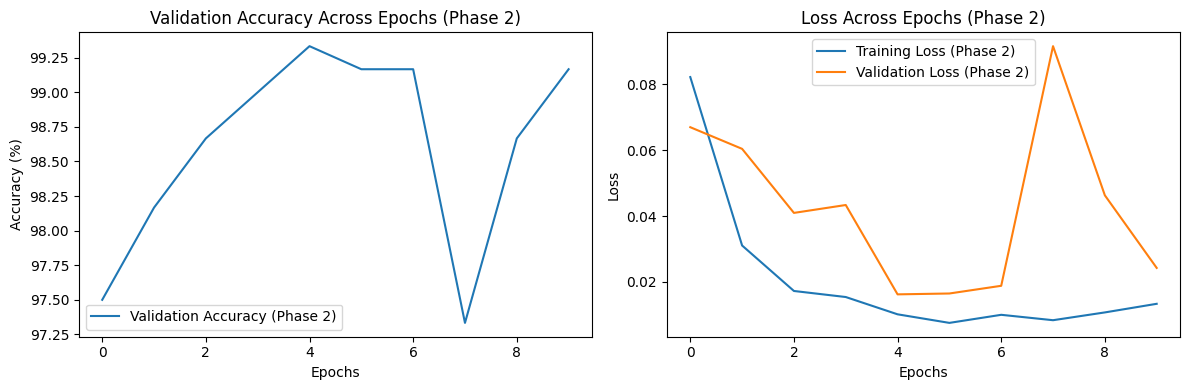

In [ ]:
# =========================
# 3. Training and Validation Setup
# =========================

import matplotlib.pyplot as plt

# Define loss function
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

train_losses, val_losses, val_accuracies = [], [], []

# Phase 1: Train only the classifier layers
for param in model.features.parameters():
    param.requires_grad = False  # Freeze base model layers

optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)  # Higher learning rate for new layers
epochs_phase_1 = 10  # Adjust epochs for phase 1

print("Phase 1: Training Classifier Layers Only")
for epoch in range(epochs_phase_1):
    # Training loop
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_losses.append(running_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch {epoch+1}/{epochs_phase_1}, "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Validation Loss: {val_loss/len(val_loader):.4f}, "
          f"Validation Accuracy: {100 * correct / total:.2f}%")

# Plot training and validation results after Phase 1
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(val_accuracies, label='Validation Accuracy (Phase 1)')
plt.title('Validation Accuracy Across Epochs (Phase 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss (Phase 1)')
plt.plot(val_losses, label='Validation Loss (Phase 1)')
plt.title('Loss Across Epochs (Phase 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Phase 2: Fine-tune the entire model
for param in model.features.parameters():
    param.requires_grad = True  # Unfreeze base model layers

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Lower learning rate for fine-tuning
epochs_phase_2 = 10  # Adjust epochs for phase 2

train_losses_phase_2, val_losses_phase_2, val_accuracies_phase_2 = [], [], []

print("Phase 2: Fine-Tuning Entire Model")
for epoch in range(epochs_phase_2):
    # Training loop
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_losses_phase_2.append(running_loss/len(train_loader))
    val_losses_phase_2.append(val_loss/len(val_loader))
    val_accuracies_phase_2.append(100 * correct / total)

    print(f"Epoch {epoch+1}/{epochs_phase_2}, "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Validation Loss: {val_loss/len(val_loader):.4f}, "
          f"Validation Accuracy: {100 * correct / total:.2f}%")

# Plot training and validation results after Phase 2
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(val_accuracies_phase_2, label='Validation Accuracy (Phase 2)')
plt.title('Validation Accuracy Across Epochs (Phase 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_losses_phase_2, label='Training Loss (Phase 2)')
plt.plot(val_losses_phase_2, label='Validation Loss (Phase 2)')
plt.title('Loss Across Epochs (Phase 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Test Loss: 0.0358, Test Accuracy: 98.62%
Test Loss: 0.0358, Test Accuracy: 98.62%
Precision: 0.9869, Recall: 0.9826, F1-Score: 0.9847
Sensitivity: 0.9826, Specificity: 0.9892


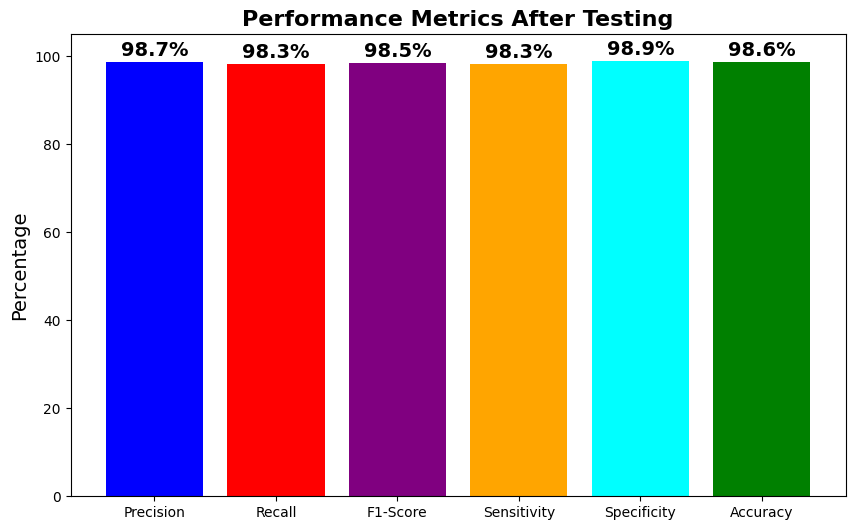

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Define test dataset path
test_dataset_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Splitted Brain Tumor/test"
test_dataset = datasets.ImageFolder(root=test_dataset_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize variables to track test loss and accuracy
test_loss = 0.0
correct = 0
total = 0
all_labels = []
all_predictions = []

# Testing loop
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Calculate predictions
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store labels and predictions for metrics calculation
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate average test loss and accuracy
average_test_loss = test_loss / len(test_loader)
test_accuracy = 100 * correct / total
print(f"Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Convert lists to numpy arrays for evaluation
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Calculate Sensitivity and Specificity
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print test results
print(f"Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

# Plot performance metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Sensitivity', 'Specificity', 'Accuracy']
values = [precision * 100, recall * 100, f1 * 100, sensitivity * 100, specificity * 100, test_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'red', 'purple', 'orange', 'cyan', 'green'])

# Add values on top of bars with larger font and clear positioning
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Adjust the position slightly above the bar
             f"{value:.1f}%", ha='center', va='bottom', color='black', fontsize=14, fontweight='bold')

plt.title('Performance Metrics After Testing', fontsize=16, fontweight='bold')
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 105)  # Increase y-limit slightly for better spacing
plt.show()



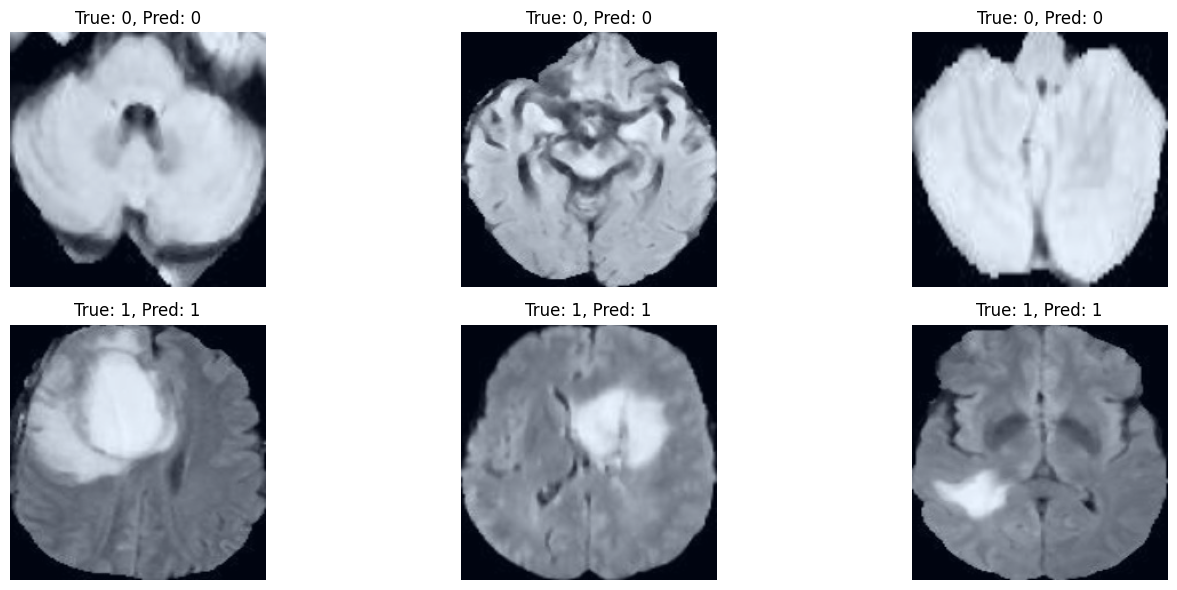

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store selected images and labels
selected_images = []
selected_labels = []
selected_predictions = []

# Desired number of images per class
num_images_per_class = 3
rows, cols = 2, num_images_per_class  # Grid dimensions (2 rows: one for each class)

# Counters for the two classes
tumor_count = 0
no_tumor_count = 0

# Iterate through the test loader to collect images
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()

        for i in range(len(labels)):
            if tumor_count < num_images_per_class and labels[i] == 1:
                selected_images.append(inputs[i].cpu())
                selected_labels.append(labels[i].item())
                selected_predictions.append(predicted[i].item())
                tumor_count += 1
            elif no_tumor_count < num_images_per_class and labels[i] == 0:
                selected_images.append(inputs[i].cpu())
                selected_labels.append(labels[i].item())
                selected_predictions.append(predicted[i].item())
                no_tumor_count += 1

            # Stop once we have enough images
            if tumor_count == num_images_per_class and no_tumor_count == num_images_per_class:
                break
        if tumor_count == num_images_per_class and no_tumor_count == num_images_per_class:
            break

# Plot the images
plt.figure(figsize=(15, 6))
for i in range(len(selected_images)):
    plt.subplot(rows, cols, i + 1)

    # Prepare the image for visualization
    image = selected_images[i].permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
    image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1]

    true_label = int(selected_labels[i])
    pred_label = int(selected_predictions[i])

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {true_label}, Pred: {pred_label}")

plt.tight_layout()
plt.show()


# Thank you

--------------------------------------------------------------------------
